# Các cách xử lý ảnh phần 2 - Convolution và Subsampling
Trong lab này, chúng ta sẽ củng cố kiến thức về Subsampling và Convolution trong CNN thông qua các bài tập về xử lý ảnh. 
1. Cách chuyển ảnh màu sang đen trắng
2. Subsampling
3. Convolution
    * Bước Convolution, các filter thông dụng
    * Non-linearity

Một số hỉnh ảnh minh họa lấy từ https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/. 

## 1. Cách chuyển ảnh màu sang đen trắng
Đầu tiên hãy import các thư viện quen thuộc.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mp_image
import tensorflow as tf

Để thực hiện lab này, bạn hãy chọn một bức ảnh màu bất kì hoặc sử dụng bức ảnh Văn Miếu dưới đây. Hãy nhớ chuyển hóa ảnh thành 3 kênh màu RGB.

In [3]:
image = mp_image.imread('../../images/Filters/vanmieu.png')
image = image[:, :, :3]
image.shape

(240, 360, 3)

Và plot hình ảnh bằng matplotlib.pyplot.

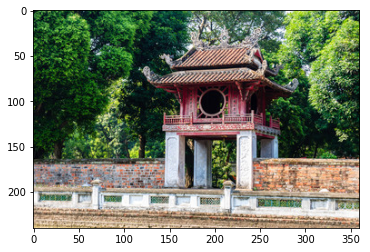

In [66]:
plt.imshow(image)
plt.show()

Để dễ dàng quan sát hiệu ứng ảnh, chúng ta sẽ sử dụng ảnh đen trắng (1 kênh) thay vì ảnh màu (3 kênh).

<img src="../../images/Filters/convert_to_gray.png" />

> <b>Checkpoint 1:</b> Hãy viết hàm $convert\_to\_gray()$, nhận vào một ảnh màu và trả về một ảnh đen trắng. Biết công thức tính giá trị của điểm ảnh đen trắng theo 3 kênh màu là $Red*0.299 + Green*0.587 + Blue*0.114$.

In [19]:
def convert_to_gray(image):
    pass

In [4]:
def convert_to_gray(image):
    red = image[:, :, 0]
    green = image[:, :, 1]
    blue = image[:, :, 2]
    # R*0.299 + G*0.587 + B*0.114
    gray_image = red*0.299 + green*0.587 + blue*0.114
    return gray_image

In [5]:
gray_image = convert_to_gray(image)
gray_image.shape

(240, 360)

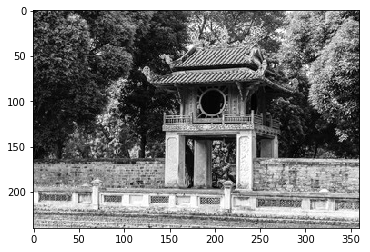

In [14]:
plt.imshow(gray_image, cmap='gray')
plt.show()

<center><img style="width: 935px; height: 223px" src="../../images/Filters/convnet.png" /></center>

Mô tả lại network. Sau bước Convolution thứ nhất thu được feature map với độ sâu là 3 (có nghĩa đã sử dụng 3 filter). Bước Pooling/Subsampling không làm thay đổi độ sâu nhưng thay đổi kích thước của feature map. Sau bước Convolution thứ 2 thu được feature map tiếp theo với độ sâu là 6, nghĩa là bước này sử dụng 6 filter. Tương tự, bước Subsampling thứ 2 cho feature map với cùng độ sâu nhưng kích thước nhỏ hơn. Feature map này được đưa vào DNN (2 hidden layers) và cho ra output prediction.
Bước Subsampling áp dụng sau 1 hoặc vài bước Convolution, và thậm chí bước Subsampling không xuất hiện trong một số network (bước Convolution có thể tự giảm kích thước feature map). Tuy nhiên do Subsampling dễ giải thích hơn, ta đi vào bước này trước.

## 2. Pooling/Subsampling/Downsampling
<i>Áp dụng lên các feature maps thu được từ Convolution</i>
### Các loại subsampling
* Max pooling
* Average pooling
* Sum pooling

<center><img src="../../images/Filters/max_pool.png" /></center>

### Mục đích
* bỏ qua những giá trị không quan trọng (ví dụ max-pool chỉ lấy giá trị lớn nhất trong 1 vùng)
* giảm kích thước của feature maps, giúp tính toán ở các lớp sau nhanh hơn
* giúp network giải quyết biến dạng

### Ví dụ max pooling
<img style="float: right; width: 374px; height: 315px;" src="../../images/Filters/max_pool.png" />
<div style="border: 50px">
    <p> Tưởng tượng có một filter trượt theo ảnh từ trái qua phải, từ trên xuống dưới như bước Convolution. Filter này trả lại giá trị lớn nhất trong feature map nó bao phủ.</p> 
    <li><b>Input size</b> 4x4</li>
    <li><b>Filter size</b> 2x2</li>
    <li><b>Stride</b> 2</li>
    <li><b>Padding</b> 'VALID'</li>
</div>

### Ví dụ max pooling
<img style="float: right; width: 374px; height: 315px;" src="../../images/Filters/max_pool.png" />
<div style="border: 50px">
    <p> Tưởng tượng có một filter trượt theo ảnh từ trái qua phải, từ trên xuống dưới như bước Convolution. Filter này trả lại giá trị lớn nhất trong feature map nó bao phủ.</p>
    <li><b>Input size</b> 4x4</li>
    <li><b>Filter size</b> 2x2</li>
    <li><b>Stride</b> 2</li>
    <li><b>Padding</b> 'VALID'</li>
    <blockquote>Điều gì xảy ra khi stride size lớn hơn số điểm còn thừa ở sát bên phải? Ở dưới cùng?
</div>

### Padding = 'VALID'
#### Filter bỏ qua những điểm ở cuối không đủ để chứa filter
<img style="width: 1000px; height: 150px;" src="../../images/Filters/valid_padding.png" />
* <b>Input size</b> 13x13
* <b>Filter size</b> 6x6
* <b>Stride</b> 5

Nguồn: https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t

### Padding = 'SAME'
#### Thêm 0 đều vào viền (trái, phải, trên, dưới) sao cho tất cả các điểm đều được qua subsampling 
<img style="width: 1000px; height: 210px;" src="../../images/Filters/same_padding.png" />
* <b>Input</b> 13x13
* <b>Filter size</b> 6x6
* <b>Stride</b> 5

> <b>Checkpoint 2:</b> Viết hàm $max\_pool\_2x2()$, nhận một ảnh đen trắng, trả lại một ảnh đen trắng đã qua max pooling với stride 2 và cách padding là 'VALID'. Plot hình ảnh thu được và so sánh với gốc.

In [16]:
def max_pool_2x2(gray_image, stride=2, padding='VALID'):
    pass

> <b>Checkpoint 3:</b> Hãy sửa hàm trên sao cho kết quả vẫn đúng khi stride khác 2 (nếu chưa đúng). Viết hàm $average\_pool\_2x2()$ tương tự, plot hình ảnh thu được và so sánh với ảnh từ $max\_pool\_2x2()$.

In [17]:
def average_pool_2x2(gray_image, stride=2, padding='VALID'):
    pass

## 3. Convolution

In [20]:
def filter_color_image(kernel, image):
    filtered_image = np.zeros((image.shape[0] - 2, image.shape[1] - 2, image.shape[2]))
    for i in range(filtered_image.shape[0] - 1):
        for j in range(filtered_image.shape[1] - 1):
            for k in range(filtered_image.shape[2]):
                new_value = np.sum(image[i:(i+3), j:(j+3), k] * kernel)
                if new_value < 0:
                    new_value = 0.0
                elif new_value > 1:
                    new_value = 1.0
                filtered_image[i, j, k] = new_value
    return filtered_image

In [18]:
def filter_gray_image(kernel, image):
    filtered_image = np.zeros((image.shape[0] - 2, image.shape[1] - 2))
    for i in range(filtered_image.shape[0] - 1):
        for j in range(filtered_image.shape[1] - 1):
            new_value = np.sum(image[i:(i+3), j:(j+3)] * kernel)
            if new_value < 0:
                new_value = 0.0
            elif new_value > 1:
                new_value = 1.0
            filtered_image[i, j] = new_value
    return filtered_image

<img style="width:384px; height:573px;" src="../../images/Filters/filter_matrices.png" />

In [19]:
edge_detect_kernel_1 = np.array([[1, 0, -1], 
                                 [0, 0, 0], 
                                 [-1, 0, 1]])
edge_detect_kernel_2 = np.array([[0, 1, 0], 
                                 [1, -4, 1], 
                                 [0, 1, 0]])
edge_detect_kernel_3 = np.array([[-1, -1, -1], 
                                 [-1, 8, -1], 
                                 [-1, -1, -1]])

blur_kernel_1 = np.ones((3, 3))/9.0
blur_kernel_2 = np.array([[1, 2, 1], 
                          [2, 4, 2], 
                          [1, 2, 1]])/16.0

sharpen_kernel = np.array([[0, -1, 0], 
                           [-1, 5, -1], 
                           [0, -1, 0]])

In [20]:
def plot_filter_color_image_1(kernel, image):
    plt.figure(figsize=(7, 3))
    plt.subplot(121)
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(filter_color_image(kernel, image))
    plt.axis('off')
    plt.show()
    
def plot_filter_color_image(kernels_dict, image):
    fig = plt.figure(figsize=(8, 24))
    for i, kernel_name in enumerate(sorted(kernels_dict.keys())):
        a=fig.add_subplot(len(kernels_dict), 2, 2*i+1)
        plt.imshow(image)
        a.set_title('Original')
        a.axis('off')
        a=fig.add_subplot(len(kernels_dict), 2, 2*i+2)
        plt.imshow(filter_color_image(kernels_dict[kernel_name], image))
        a.set_title(kernel_name)
        a.axis('off')
    plt.show()
    
def plot_filter_gray_image_1(kernel, image):
    plt.figure(figsize=(7, 3))
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.set_title("original")

    plt.subplot(122)
    plt.imshow(filter_gray_image(kernel, image), cmap='gray')
    plt.axis('off')
    plt.set_title("filtered")
    plt.show()
    
def plot_filter_gray_image(kernels_dict, image):
    fig = plt.figure(figsize=(8, 24))
    for i, kernel_name in enumerate(sorted(kernels_dict.keys())):
        a=fig.add_subplot(len(kernels_dict), 2, 2*i+1)
        plt.imshow(image, cmap='gray')
        a.set_title('Original')
        a.axis('off')
        a=fig.add_subplot(len(kernels_dict), 2, 2*i+2)
        plt.imshow(filter_gray_image(kernels_dict[kernel_name], image), cmap='gray')
        a.set_title(kernel_name)
        a.axis('off')
    plt.show()

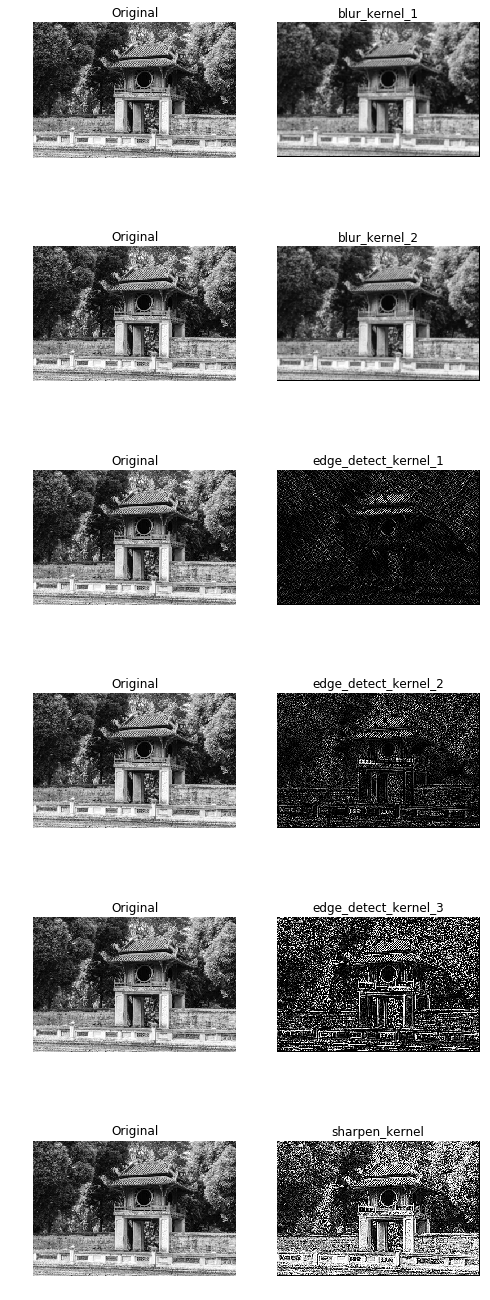

In [21]:
kernels_dict = { "edge_detect_kernel_1": edge_detect_kernel_1, 
                 "edge_detect_kernel_2": edge_detect_kernel_2, 
                 "edge_detect_kernel_3":edge_detect_kernel_3,
                 "blur_kernel_1": blur_kernel_1, 
                 "blur_kernel_2": blur_kernel_2,
                 "sharpen_kernel": sharpen_kernel
               }
plot_filter_gray_image(kernels_dict, gray_image)

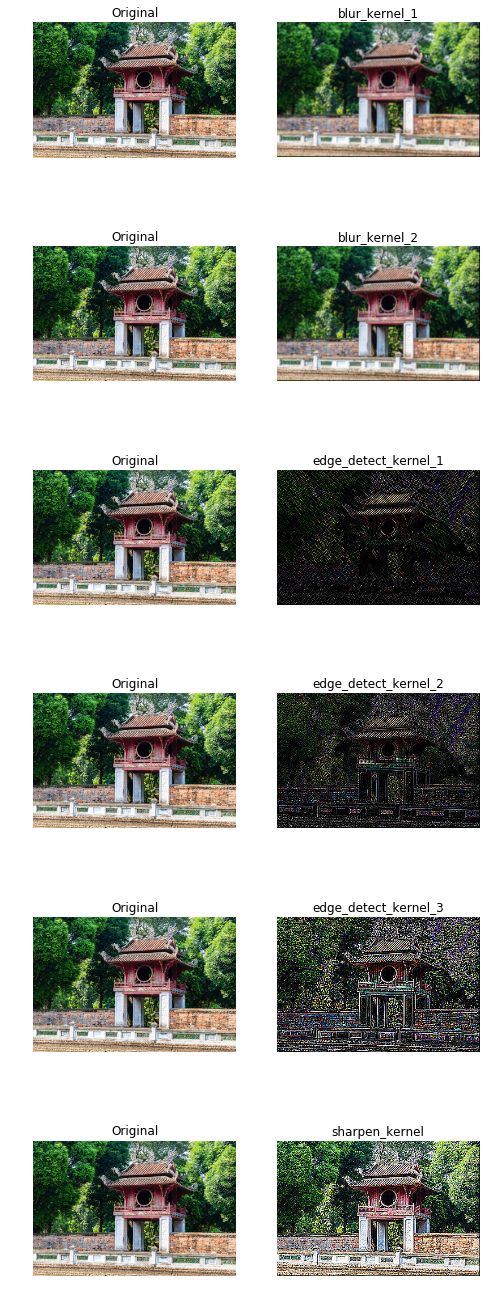

In [59]:
plot_filter_color_image(kernels_dict, image)